# 图像重建

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
from skimage.transform import radon
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from scipy.misc import imread, imresize, imsave

In [2]:
image = cv2.imread('../datas/phantom.jpg',0)

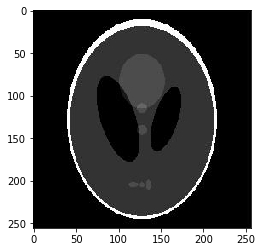

In [3]:
plt.imshow(image,'gray')

In [4]:
# Radon变换
theta = np.arange(0,180)
image = image.astype(np.float32) / 255.0
R = radon(image,theta=theta)

C:\Users\jenson\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:58: UserWarning: The default of `circle` in `skimage.transform.radon` will change to `True` in version 0.15.
  warn('The default of `circle` in `skimage.transform.radon` '


Text(0.5,1,'Radon Transform Result')

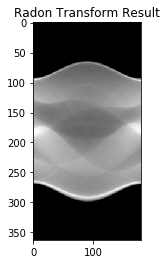

In [5]:
plt.imshow((R).astype(np.uint8),'gray')
plt.title('Radon Transform Result')

In [6]:
# Basic parameters for backprojection and filtered backprojection
F = R.shape[0]
thetas = (np.pi / 180.0) * theta # Number of parallel projections
image_pad = np.zeros((F,F),dtype=np.float32) # Backprojected image setup
middle_index = int(np.ceil(F / 2 + 1))
cor = np.arange(int(np.ceil(-F/2)),int(np.ceil(F / 2)))
[x,y] = np.meshgrid(cor,cor) # Setup image coordinates
costheta = np.cos(thetas)
sintheta = np.sin(thetas)
l = len(thetas) # Number of angular projections

In [7]:
for i in range(l):
    # Projections to their corresponding spots
    image_construct = np.round(middle_index+x*sintheta[i] +  y*costheta[i])
    # Coordinates in bound
    indices = (image_construct > 0) & (image_construct < F)
    image_new = image_construct[indices]
    # Summation
    image_pad[indices] = image_pad[indices] + R[image_new.astype(np.int32),i] / l

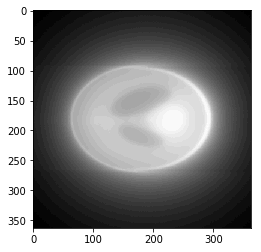

In [8]:
plt.imshow(image_pad.astype('uint8'),'gray')